In [1]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [12]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.5 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [13]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

In [16]:
ticker_list = ['AMZN','AAPL','TSLA','GE','F','PFE','MSFT','JNJ','MRNA','IBM','BAC','CVX','BABA','BIDU','NIO','PDD','ROKU','NFLX','DIS']

In [17]:
data = pdr.get_data_yahoo(ticker_list, start="2019-01-01")


[*********************100%***********************]  19 of 19 completed


In [43]:
data.head()

Adj Close                           ...    Volume                    
                 AAPL         AMZN        BABA  ...       PFE      ROKU      TSLA
Date                                            ...                              
2019-01-02  38.326298  1539.130005  136.699997  ...  26430315  11890300  58293000
2019-01-03  34.508709  1500.280029  130.600006  ...  28503533  14989400  34826000
2019-01-04  35.981861  1575.390015  139.750000  ...  27145348  15505500  36970500
2019-01-07  35.901768  1629.510010  143.100006  ...  20995469  42253700  37756000
2019-01-08  36.586174  1656.579956  146.789993  ...  19677231  44167700  35042500

[5 rows x 114 columns]

In [18]:
stock_open = np.array(data['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(data['Close']).T # stock_close is numpy array of transpose of df['Close']

In [20]:
movements = stock_close-stock_open

In [21]:
sum_of_movement = np.sum(movements,1)

In [24]:
for i in range(len(ticker_list)):
  print('company:{}, Change:{}'.format(data['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:70.03231048583984
company:AMZN, Change:-382.3131103515625
company:BABA, Change:-112.54279327392578
company:BAC, Change:9.680023193359375
company:BIDU, Change:-64.510009765625
company:CVX, Change:-37.90996551513672
company:DIS, Change:-74.4402084350586
company:F, Change:-3.410012722015381
company:GE, Change:-46.626129150390625
company:IBM, Change:9.465934753417969
company:JNJ, Change:-4.8099212646484375
company:MRNA, Change:339.1589946746826
company:MSFT, Change:97.2799072265625
company:NFLX, Change:144.0295867919922
company:NIO, Change:-8.640015840530396
company:PDD, Change:-86.18013381958008
company:PFE, Change:-16.39234161376953
company:ROKU, Change:-10.895755767822266
company:TSLA, Change:195.77917098999023


In [26]:
from sklearn.preprocessing import Normalizer

In [28]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 5,max_iter = 1000)


In [29]:
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [30]:
# Fit pipeline to daily stock movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

In [31]:
df1 = pd.DataFrame({'labels':labels,'companies':list(ticker_list)}).sort_values(by=['labels'],axis = 0)

In [32]:
df1

labels companies
16       0      ROKU
10       0       BAC
9        1       IBM
3        1        GE
5        1       PFE
6        1      MSFT
7        1       JNJ
8        1      MRNA
13       2      BIDU
12       2      BABA
0        2      AMZN
1        2      AAPL
11       3       CVX
14       3       NIO
15       3       PDD
17       3      NFLX
18       3       DIS
4        4         F
2        4      TSLA

include PCA

In [34]:
from sklearn.decomposition import PCA

In [39]:
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 5,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)

In [40]:
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
labels = pipeline.predict(movements)

In [41]:
df1 = pd.DataFrame({'labels':labels,'companies':list(ticker_list)}).sort_values(by=['labels'],axis = 0)

In [42]:
df1

labels companies
0        0      AMZN
1        0      AAPL
2        0      TSLA
13       0      BIDU
12       0      BABA
3        1        GE
5        1       PFE
6        1      MSFT
7        1       JNJ
8        1      MRNA
15       2       PDD
14       2       NIO
18       2       DIS
17       2      NFLX
4        2         F
11       2       CVX
10       3       BAC
16       3      ROKU
9        4       IBM

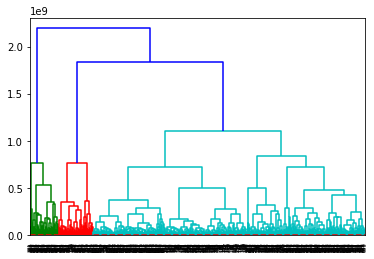

In [46]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# create dendrogram
dendrogram_2017 = sch.dendrogram(sch.linkage(data, method='ward'))
plt.axhline(y=3.5, color='r', linestyle='--')